In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Visualization
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pickle

In [43]:
# Set plot chart Params
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [44]:
# Read in the csv file fromn github
df = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv')

print('\nNumber of rows and columns in the data set: ',df.shape)

# Assign the columns a name
y = df.speed
k = df.power
# Determine the features
features = ['speed', 'power']
X = df[features]
X.describe()


Number of rows and columns in the data set:  (500, 2)


,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


Text(6.8700000000000045, 0.5, 'power')

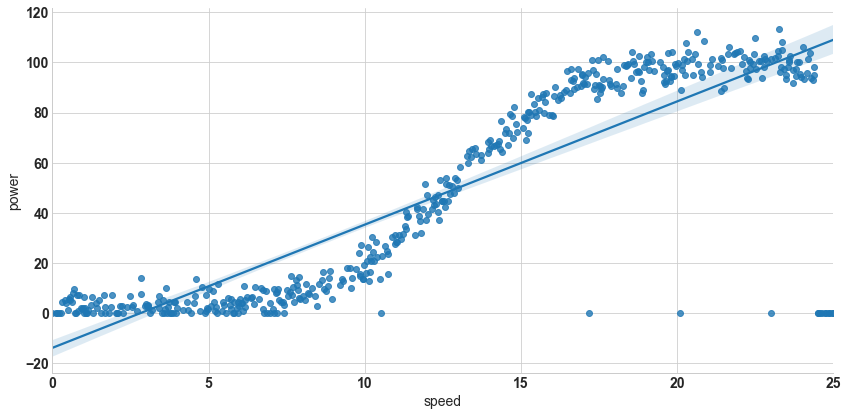

In [45]:
# Plot the raw data
sns.lmplot(x='speed',y='power',data=df,aspect=2,height=6)
plt.xlabel('speed')
plt.ylabel('power')

In [46]:
# Define model. Specify a number for random_state to ensure same results each run
model = DecisionTreeRegressor(random_state=100)

# Fit model
model.fit(X, y)
prediction = model.predict(X)

Text(0.5, 1.0, 'Prediction')

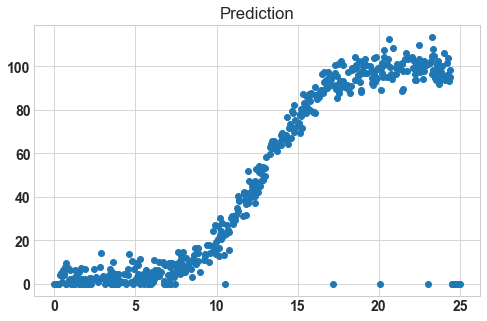

In [47]:
# Prediction data 
plt.scatter(prediction, k)
plt.title('Prediction')

Text(0.5, 1.0, 'Dataset')

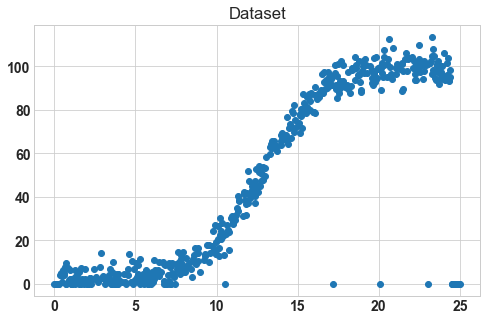

In [48]:
# Raw data set from csv file
plt.scatter(x='speed',y='power',data=df)
plt.title('Dataset')

In [49]:
# Saving the model using Pickle
directory="models"
filename = directory+'\model2.sav'
pickle.dump(model, open(filename, 'wb'))

In [50]:
# Loading the model and assuring it is correct
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model)

DecisionTreeRegressor(random_state=100)


In [51]:
# Display prediction
prediction = loaded_model.predict(X)
print(prediction)

[ 0.     0.125  0.15   0.225  0.275  0.325  0.4    0.45   0.501  0.526
  0.551  0.576  0.626  0.676  0.701  0.726  0.751  0.801  0.826  0.851
  0.926  0.951  0.976  1.001  1.026  1.051  1.076  1.101  1.151  1.251
  1.276  1.301  1.401  1.426  1.502  1.552  1.652  1.677  1.702  1.827
  1.877  1.902  2.027  2.077  2.102  2.177  2.227  2.252  2.402  2.477
  2.553  2.578  2.703  2.828  2.853  2.953  3.003  3.028  3.053  3.078
  3.128  3.203  3.378  3.403  3.428  3.504  3.529  3.579  3.604  3.629
  3.679  3.704  3.729  3.779  3.804  3.879  3.904  3.929  3.954  3.979
  4.179  4.304  4.329  4.429  4.53   4.555  4.605  4.73   4.78   4.88
  4.905  4.93   4.955  4.98   5.03   5.08   5.13   5.18   5.205  5.255
  5.28   5.305  5.43   5.455  5.506  5.556  5.631  5.681  5.706  5.731
  5.781  5.806  5.831  5.906  5.931  5.956  5.981  6.006  6.031  6.081
  6.106  6.131  6.156  6.181  6.231  6.356  6.406  6.456  6.481  6.607
  6.682  6.732  6.757  6.782  6.832  6.857  6.957  6.982  7.057  7.082
  7.107

### References
* [Pickle loading anmd saving models](https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/#:~:text=Saving%20Your%20Model-,Save%20Your%20Model%20with%20pickle,it%20to%20make%20new%20predictions.)
* [SkLearn Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)